Please read `tts_calculation_without_bootstrapping.ipynb` to understand the individual
steps taken  in going from the raw data to the time to solution. This notebook will 
focus on combining the TTS calculation with bootstrapping.

# Imports

In [8]:
#allow for autoreload of packages
%load_ext autoreload
%autoreload 2

In [9]:
import pickle
import pandas
from tqdm import tqdm
import matplotlib.pyplot as plt

In [15]:
import rawdata_to_rawdf
import ps_from_rawdf
import circuit_duration_from_calibration_data
import tts_from_rawdf
import bootstrapping

# Locate the `raw_df`

Start by locating the `raw_df` we want to work with. We exemplify this for just one dataset, but the calculation below can be looped over all datasets.

In [48]:
machine_long = 'ibm_cairo' #backend identifier
machine_short = 'cairo'
seq1 = 'xy4'
seq2 = 'ur10'
date = '20220102'
embedding = 1 #logical-to-physical embedding
rawdf_fname = f"./../data/{machine_long}/{date}/rawdf_{machine_short}_dd-{seq1}-{seq2}_marks-all_embedding-{embedding}.p"
file = open(rawdf_fname, 'rb')
rawdf = pickle.load(file)
file.close()

durations_fname = rawdf_fname.replace('rawdf', 'durations')
file = open(durations_fname, 'rb')
durations = pickle.load(file)
file.close()

In [49]:
rawdf.keys()

Index(['free', 'xy4', 'ur_10', 'ancillas', 'marked', 'remaining'], dtype='object')

A bootstrapped sample can be created for each `raw_df` by using the function below. This creates a new dataset that is similar to the original `raw_df` but is generated by bootstrapping over all shots (repetition of the experiment).

In [16]:
rawdf_2 = bootstrapping.generate_bootstrapped_df(rawdf)

In [17]:
rawdf_2.keys()

Index(['free', 'xy4', 'ur_10', 'ancillas', 'marked', 'remaining'], dtype='object')

TTS for each `raw_df` can be computed as shown below. 

In [34]:
tts_from_rawdf.tts_from_rawdf(rawdf_2, durations)

100%|██████████| 26/26 [02:42<00:00,  6.24s/it]


,free,xy4,ur_10
1,-5.935325,-5.942211,-5.948239
2,-5.757647,-5.765600,-5.764666
3,-5.614317,-5.644173,-5.633991
4,-5.473732,-5.539260,-5.529233
5,-5.318878,-5.436951,-5.420052
6,-5.136102,-5.328173,-5.318420
7,-4.927438,-5.217513,-5.216684
8,-4.695150,-5.086525,-5.102218
9,-4.430456,-4.953144,-4.979121
10,-4.130226,-4.816253,-4.853506


# Generate bootstrapped TTS and export it

In [33]:
bootstrapping.export_bootstrapped_tts_from_rawdf(rawdf_fname, N=100)

100%|██████████| 100/100 [4:40:23<00:00, 168.23s/it]


'./../data/ibm_cairo/rawdf_cairo_dd-xyxy-ur10_marks-all_embedding-1.p'

In [51]:
avg_tts = bootstrapping.extract_avg_tts_from_bs_samples(rawdf_fname, export=True)

../results/avgtts_cairo_dd-xy4-ur10_marks-all_embedding-1.csv


In [52]:
avg_tts

,free mean,free err,xy4 mean,xy4 err,ur_10 mean,ur_10 err
1,-5.930815,0.001591,-5.940267,0.001759,-5.944129,0.001913
2,-5.755597,0.001121,-5.765057,0.001174,-5.762928,0.001344
3,-5.614018,0.000896,-5.643387,0.001110,-5.633351,0.001126
4,-5.473502,0.000839,-5.538635,0.000946,-5.529000,0.001011
5,-5.318752,0.000932,-5.436229,0.000911,-5.420239,0.000812
6,-5.136499,0.000965,-5.327572,0.000779,-5.318869,0.000744
7,-4.927972,0.000991,-5.216799,0.000737,-5.217030,0.000722
8,-4.695919,0.001139,-5.085775,0.000741,-5.102759,0.000760
9,-4.430444,0.001377,-4.952583,0.000718,-4.979628,0.000776
10,-4.130956,0.001654,-4.816254,0.000767,-4.853707,0.000836


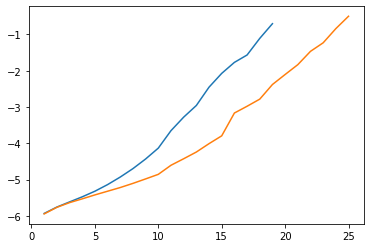

In [53]:
import matplotlib.pyplot as plt
plt.plot(avg_tts['free mean'])
plt.plot(avg_tts['ur_10 mean'])
plt.show()